
The dataset(An NOAA dataset) is to use for this project. 
Note: The data comes from a subset of The National Centers for Environmental Information (NCEI) Daily Global Historical Climatology Network (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

The following variables:
id : station identification code
date : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
element : indicator of element type
TMAX : Maximum temperature (tenths of degrees C)
TMIN : Minimum temperature (tenths of degrees C)
value : data value for element (tenths of degrees C)
For this assignment, you must:

1.python code that provides line graph of the record high and record low temperatures by day of the year over the period 2005-2014. 

2.The area between the record high and record low temperatures for each day should be shaded.

3.Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.

4.Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.

5.Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.


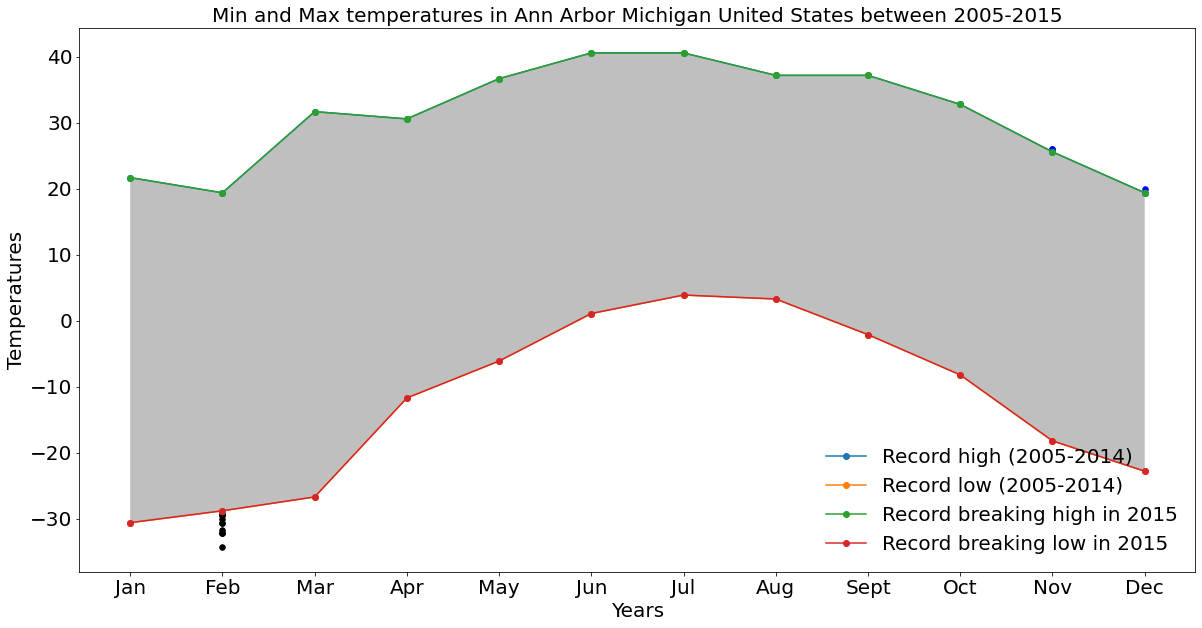

In [12]:
%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker

import pandas as pd
import numpy as np

ConversionError: Failed to convert value(s) to axis units: '2015/01/01'

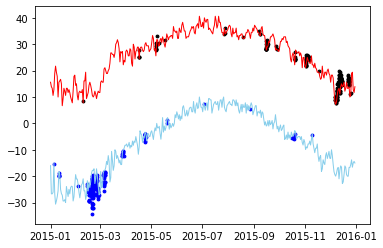

In [13]:
data = pd.read_csv(r'E:\Protfolio\Applied Plotting, Charting & Data Representation in Python/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

data['Data_Value'] = data['Data_Value']/10

data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data['Date'].dt.year

data['Month_Day'] = data['Date'].dt.strftime('%m-%d')


data = data[data['Month_Day']!='02-29']

# Max and min data after grouping by each day:
max_temp = data[(data.Year >= 2005) & (data.Year < 2015) & (data['Element'] == 'TMAX')].groupby(['Month_Day'])['Data_Value'].max()
min_temp = data[(data.Year >= 2005) & (data.Year < 2015) & (data['Element'] == 'TMIN')].groupby(['Month_Day'])['Data_Value'].min()

# Record breaking data:
data = data.merge(max_temp.reset_index(drop=False).rename(columns={'Data_Value':'Max_temp'}), on='Month_Day', how='left')
data = data.merge(min_temp.reset_index(drop=False).rename(columns={'Data_Value':'Min_temp'}), on='Month_Day', how='left')

record_high = data[(data.Year==2015)&(data.Data_Value > data.Max_temp)]
record_low = data[(data.Year==2015)&(data.Data_Value < data.Min_temp)]

# X Axis spanning 2015 only:
date_index = np.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')

plt.figure()

plt.plot(date_index,max_temp,color='red', linewidth=1) 
plt.plot(date_index,min_temp,color='skyblue', linewidth=1) 

plt.scatter(record_high.Date.values, record_high.Data_Value.values, color='black', s=8)
plt.scatter(record_low.Date.values, record_low.Data_Value.values, color='blue', s=8)

# Set x and y limits.
ax = plt.gca()
ax.axis(['2015/01/01','2015/12/31',-50,50])
ax.xaxis.label.set_color('green')
ax.yaxis.label.set_color('green')
ax.tick_params(axis='both',labelcolor='purple')

# Set axis names and title:
plt.xlabel('Date', fontsize=35)
plt.ylabel('Temp in ° Celsius', fontsize=35)
plt.title('Temperature in Ann Arbour, Michigan (2005-2015)', fontsize=40, color= 'blue')

# Create legend and title
# loc=0 provides the best position for the legend
plt.legend(['Record high (2005-2014)','Record low (2005-2014)','Record breaking high in 2015','Record breaking low in 2015'],loc=0,fontsize=20,frameon=False)


fig = plt.gcf()
fig.set_size_inches(20,10)

# Fill colour between highs and lows:
# alpha adjusts darkness of the shade.
ax.fill_between(date_index, max_temp, min_temp, facecolor='grey', alpha=0.50)

# Where you locate the major and minor ticks:
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15)) # Put the label at the minor tick so it's in the center.
#ax.yaxis.set_minor_locator()

# What you put at the ticks:
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

# 1 refers to the bottom of the plot for xticks and the left for yticks
# 2 refers to the top of the plot for xticks and the right for yticks
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0) # Make small ticker disappear
    tick.label1.set_horizontalalignment('center')

